In [1]:
import pickle
import seaborn as sns

In [2]:
with open("measure-barzur.pkl", "rb") as pkl:
    load = pickle.load(pkl)
    their = load["their"]
    our = load["our"]
    data = load["data"]

print("their:", their["model"], their["mdp"], sep="\n")
print()
print("our:", our["model"], our["mdp"], sep="\n")
data = data.assign(rpp_minus_alpha=data.rpp - data.alpha)
data

their:
barzur20aft.Bitcoin(alpha=0.125, gamma=0.25, maximum_fork_length=8)
MDP of size 179 / 4 / 657 / 3.7

our:
sm.SelfishMining(Bitcoin(), alpha=0.125, gamma=0.25, maximum_height=8, maximum_size=0, force_consider_own=True)
MDP of size 18279 / 4 / 90235 / 4.9


,alpha,gamma,horizon,eps,model,vi_discount,vi_delta,vi_stop_delta,vi_iter,vi_max_iter,vi_time,vi_start_value,vi_max_value,ss_n,ss_nonzero,ss_time,rpp,rpp_iter,rpp_time,rpp_minus_alpha
0,0.30,0.50,25,0.001,their,1,0.001025,0.001042,262,0,0.115430,8.124394,14.843444,52,52,0.001151,0.324020,2,0.025865,2.401994e-02
1,0.30,0.50,25,0.001,our,1,0.001027,0.001042,285,0,20.145114,8.194414,14.930582,237,237,0.006394,0.307427,2,0.136104,7.427029e-03
2,0.40,0.50,50,0.005,their,1,0.005092,0.005102,404,0,0.184232,24.822259,31.215247,87,87,0.001447,0.503380,2,0.043657,1.033797e-01
3,0.40,0.50,50,0.005,our,1,0.005077,0.005102,491,0,46.285970,26.677842,32.937466,722,722,0.073209,0.482266,2,0.397572,8.226570e-02
4,0.10,0.75,25,0.005,their,1,0.005138,0.005208,143,0,0.124965,2.362590,9.746012,47,47,0.001508,0.100000,2,0.036082,5.995204e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.40,0.00,25,0.001,our,1,0.001031,0.001042,313,0,24.552754,11.859520,18.041254,356,356,0.012432,0.469387,2,0.179080,6.938691e-02
536,0.40,0.50,25,0.001,their,1,0.001028,0.001042,284,0,0.168915,12.724020,18.557968,87,87,0.001345,0.503380,2,0.051482,1.033797e-01
537,0.40,0.50,25,0.001,our,1,0.001026,0.001042,347,0,23.271432,13.538233,19.124447,794,794,0.073418,0.507036,2,0.383807,1.070359e-01
538,0.25,1.00,50,0.005,their,1,0.005095,0.005102,375,0,0.226990,16.117460,23.021940,103,103,0.001582,0.332631,2,0.063833,8.263121e-02


In [3]:
data[(data.ss_n - data.ss_nonzero) != 0]

,alpha,gamma,horizon,eps,model,vi_discount,vi_delta,vi_stop_delta,vi_iter,vi_max_iter,vi_time,vi_start_value,vi_max_value,ss_n,ss_nonzero,ss_time,rpp,rpp_iter,rpp_time,rpp_minus_alpha
50,0.05,0.25,25,0.005,their,1,0.005002,0.005208,113,0,0.067691,1.122995,8.810058,5,4,0.000736,0.05,2,0.003280,-3.053113e-16
58,0.05,0.75,25,0.005,their,1,0.005002,0.005208,113,0,0.118780,1.122995,8.810058,5,4,0.001014,0.05,2,0.004803,-3.053113e-16
316,0.05,0.00,25,0.005,their,1,0.005002,0.005208,113,0,0.071630,1.122995,8.810058,5,4,0.001068,0.05,2,0.004811,-3.053113e-16
352,0.05,0.25,25,0.001,their,1,0.001018,0.001042,191,0,0.117594,1.224154,8.883080,5,4,0.000743,0.05,2,0.003355,-3.053113e-16
378,0.05,0.00,25,0.001,their,1,0.001018,0.001042,191,0,0.112692,1.224154,8.883080,5,4,0.000718,0.05,2,0.003133,-3.053113e-16
408,0.05,0.75,25,0.001,their,1,0.001018,0.001042,191,0,0.205740,1.224154,8.883080,5,4,0.001066,0.05,2,0.004866,-3.053113e-16
510,0.05,0.50,25,0.005,their,1,0.005002,0.005208,113,0,0.066648,1.122995,8.810058,5,4,0.000725,0.05,2,0.003247,-3.053113e-16


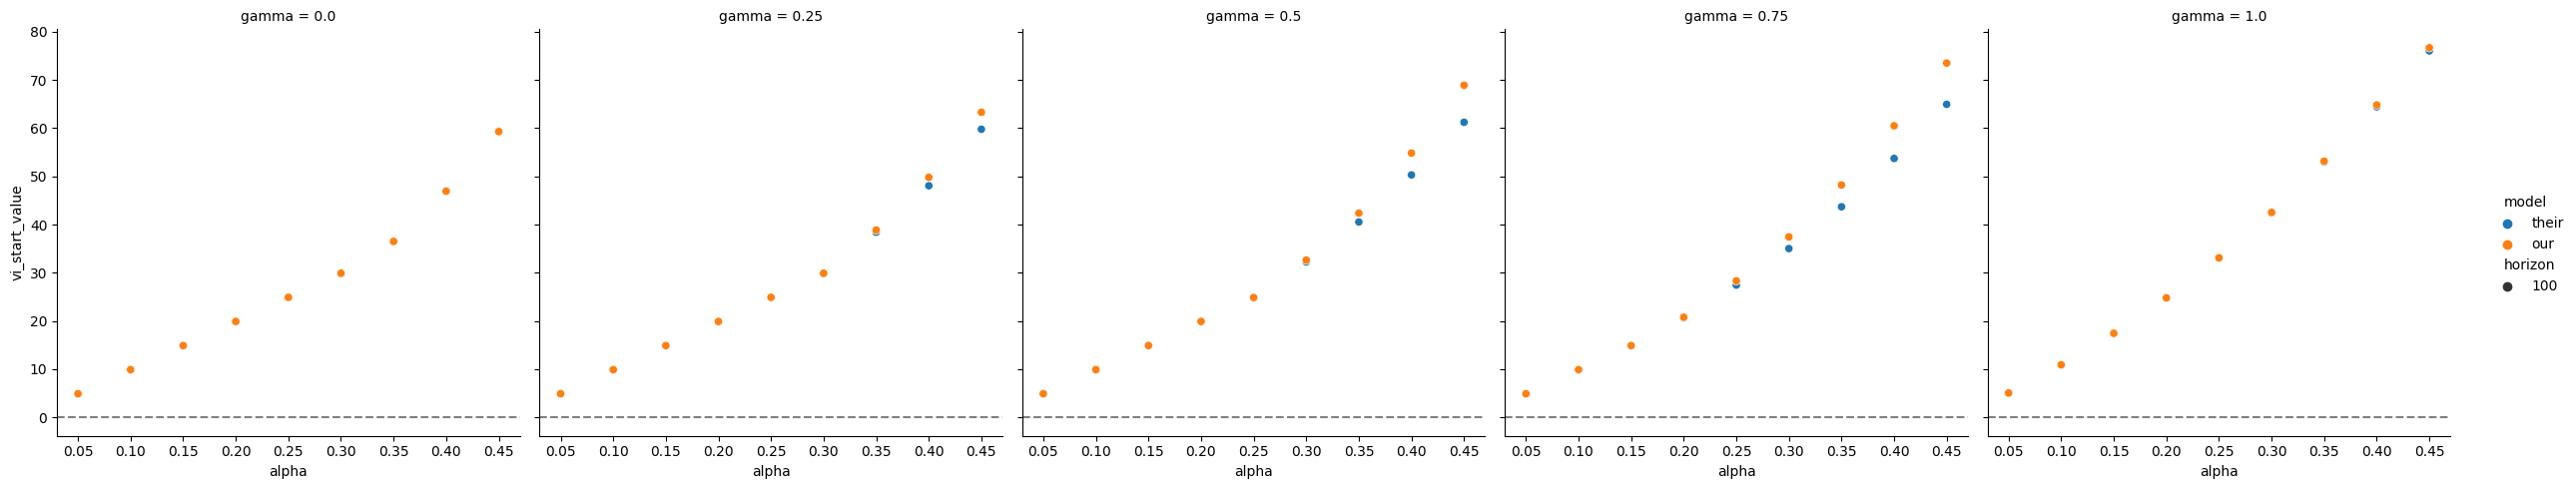

In [4]:
# Compare model w.r.t. reward
sns.relplot(
    data.query("horizon==horizon.max() and eps==eps.min()"),
    x="alpha",
    y="vi_start_value",
    col="gamma",
    style="horizon",
    hue="model",
).refline(y=0)

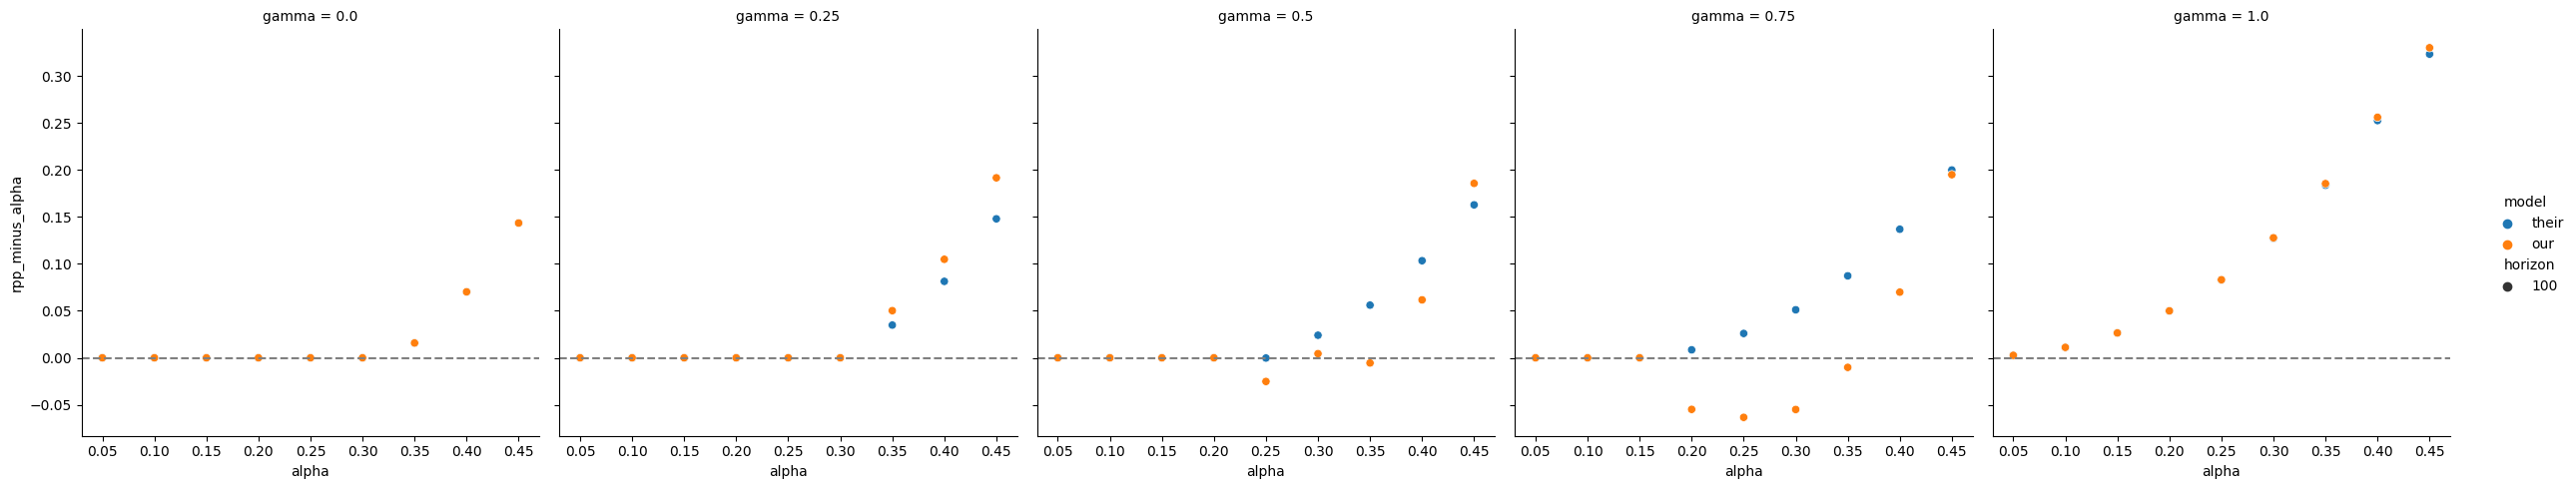

In [5]:
# Compare model w.r.t. reward
sns.relplot(
    data.query("horizon==horizon.max() and eps==eps.min()"),
    x="alpha",
    y="rpp_minus_alpha",
    col="gamma",
    style="horizon",
    hue="model",
).refline(y=0)

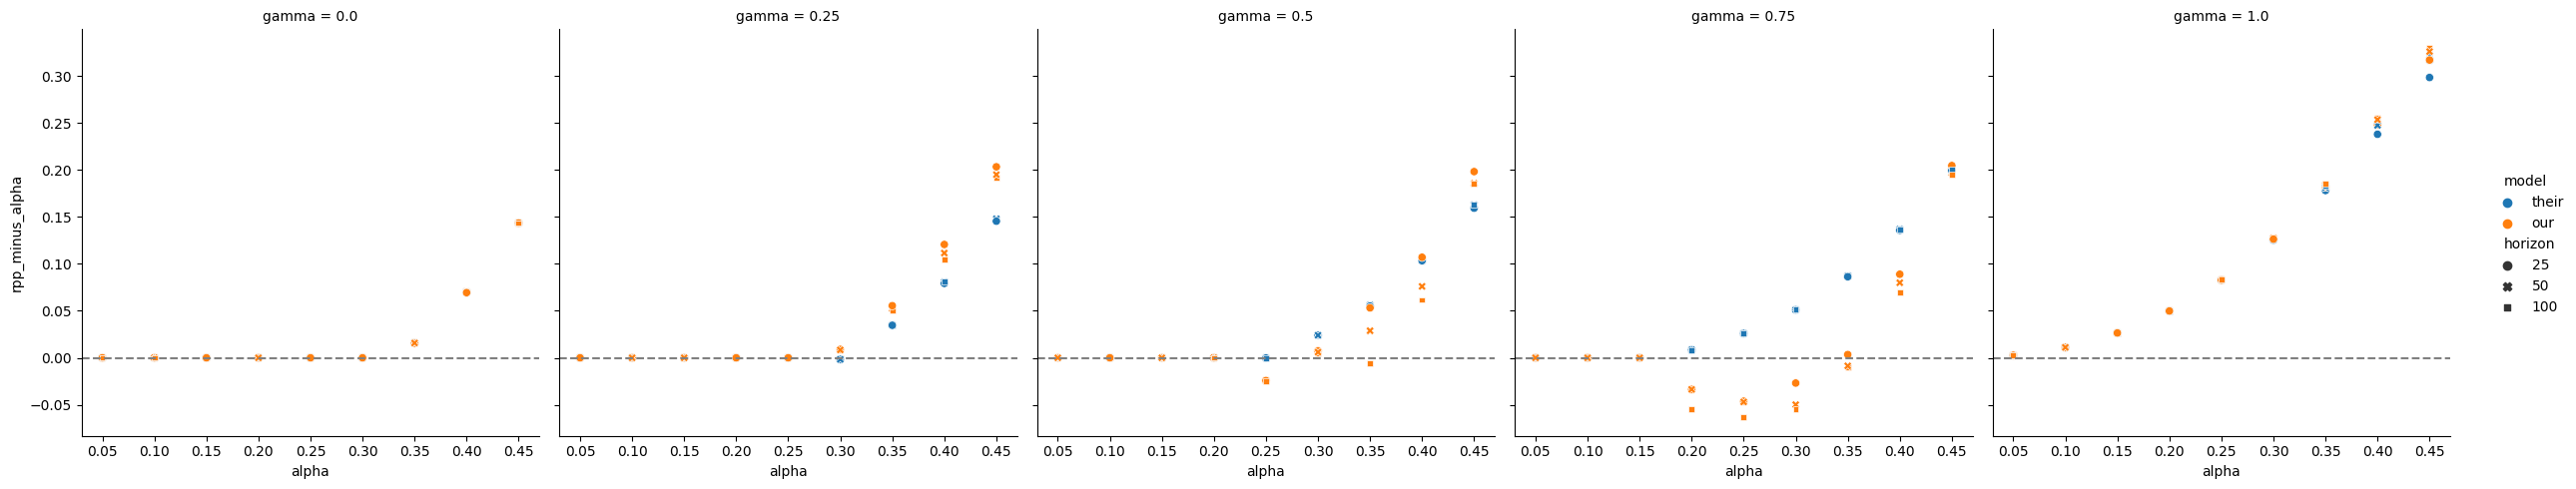

In [6]:
# Demonstrate effect of horizon
sns.relplot(
    data.query("eps==eps.min()"),
    x="alpha",
    y="rpp_minus_alpha",
    col="gamma",
    hue="model",
    style="horizon",
).refline(y=0)

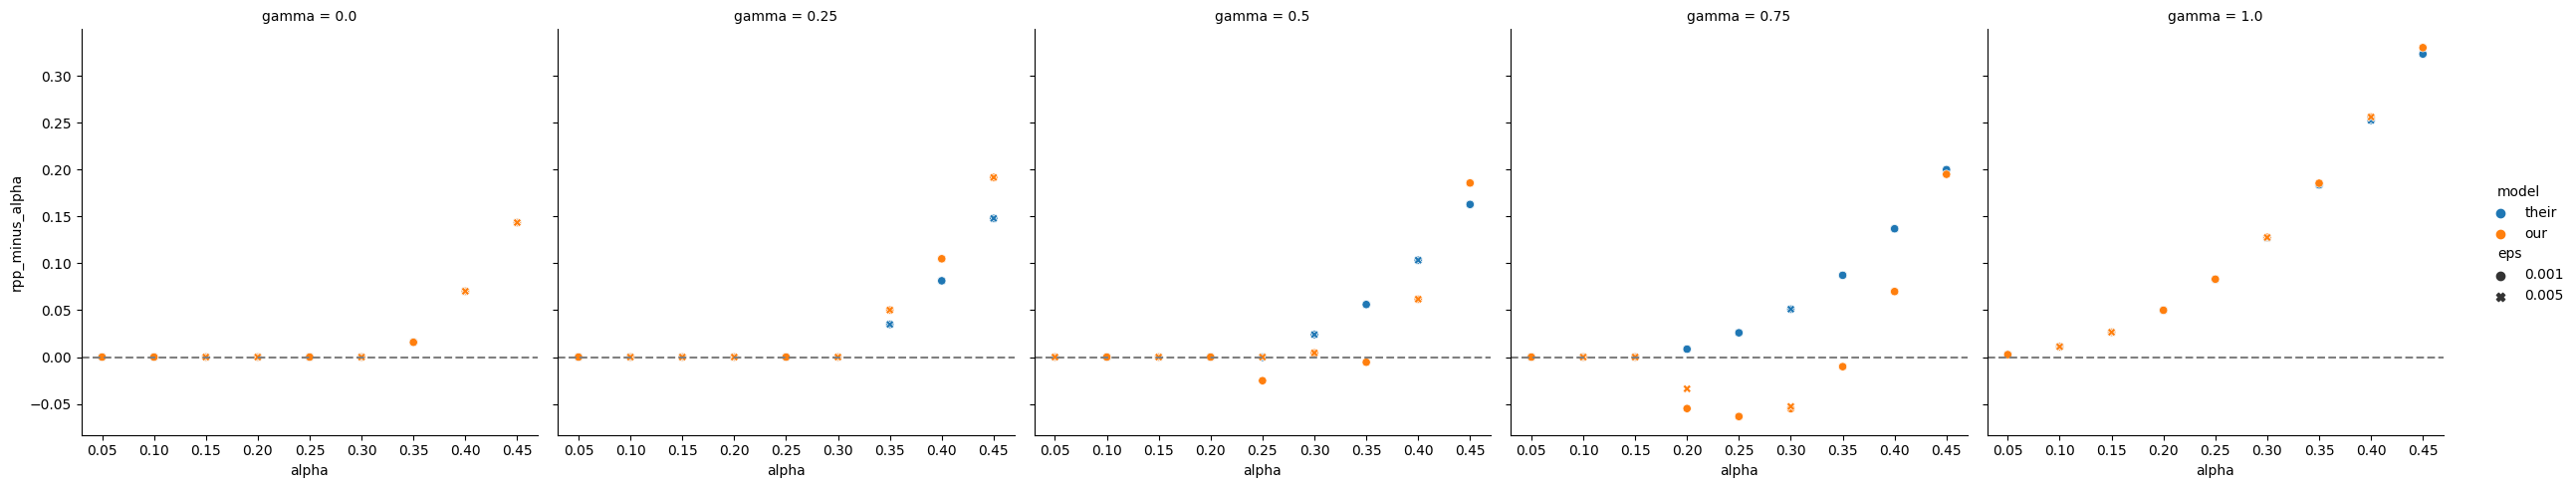

In [7]:
# Demonstrate effect of eps
sns.relplot(
    data.query("horizon==horizon.max()"),
    x="alpha",
    y="rpp_minus_alpha",
    col="gamma",
    hue="model",
    style="eps",
).refline(y=0)

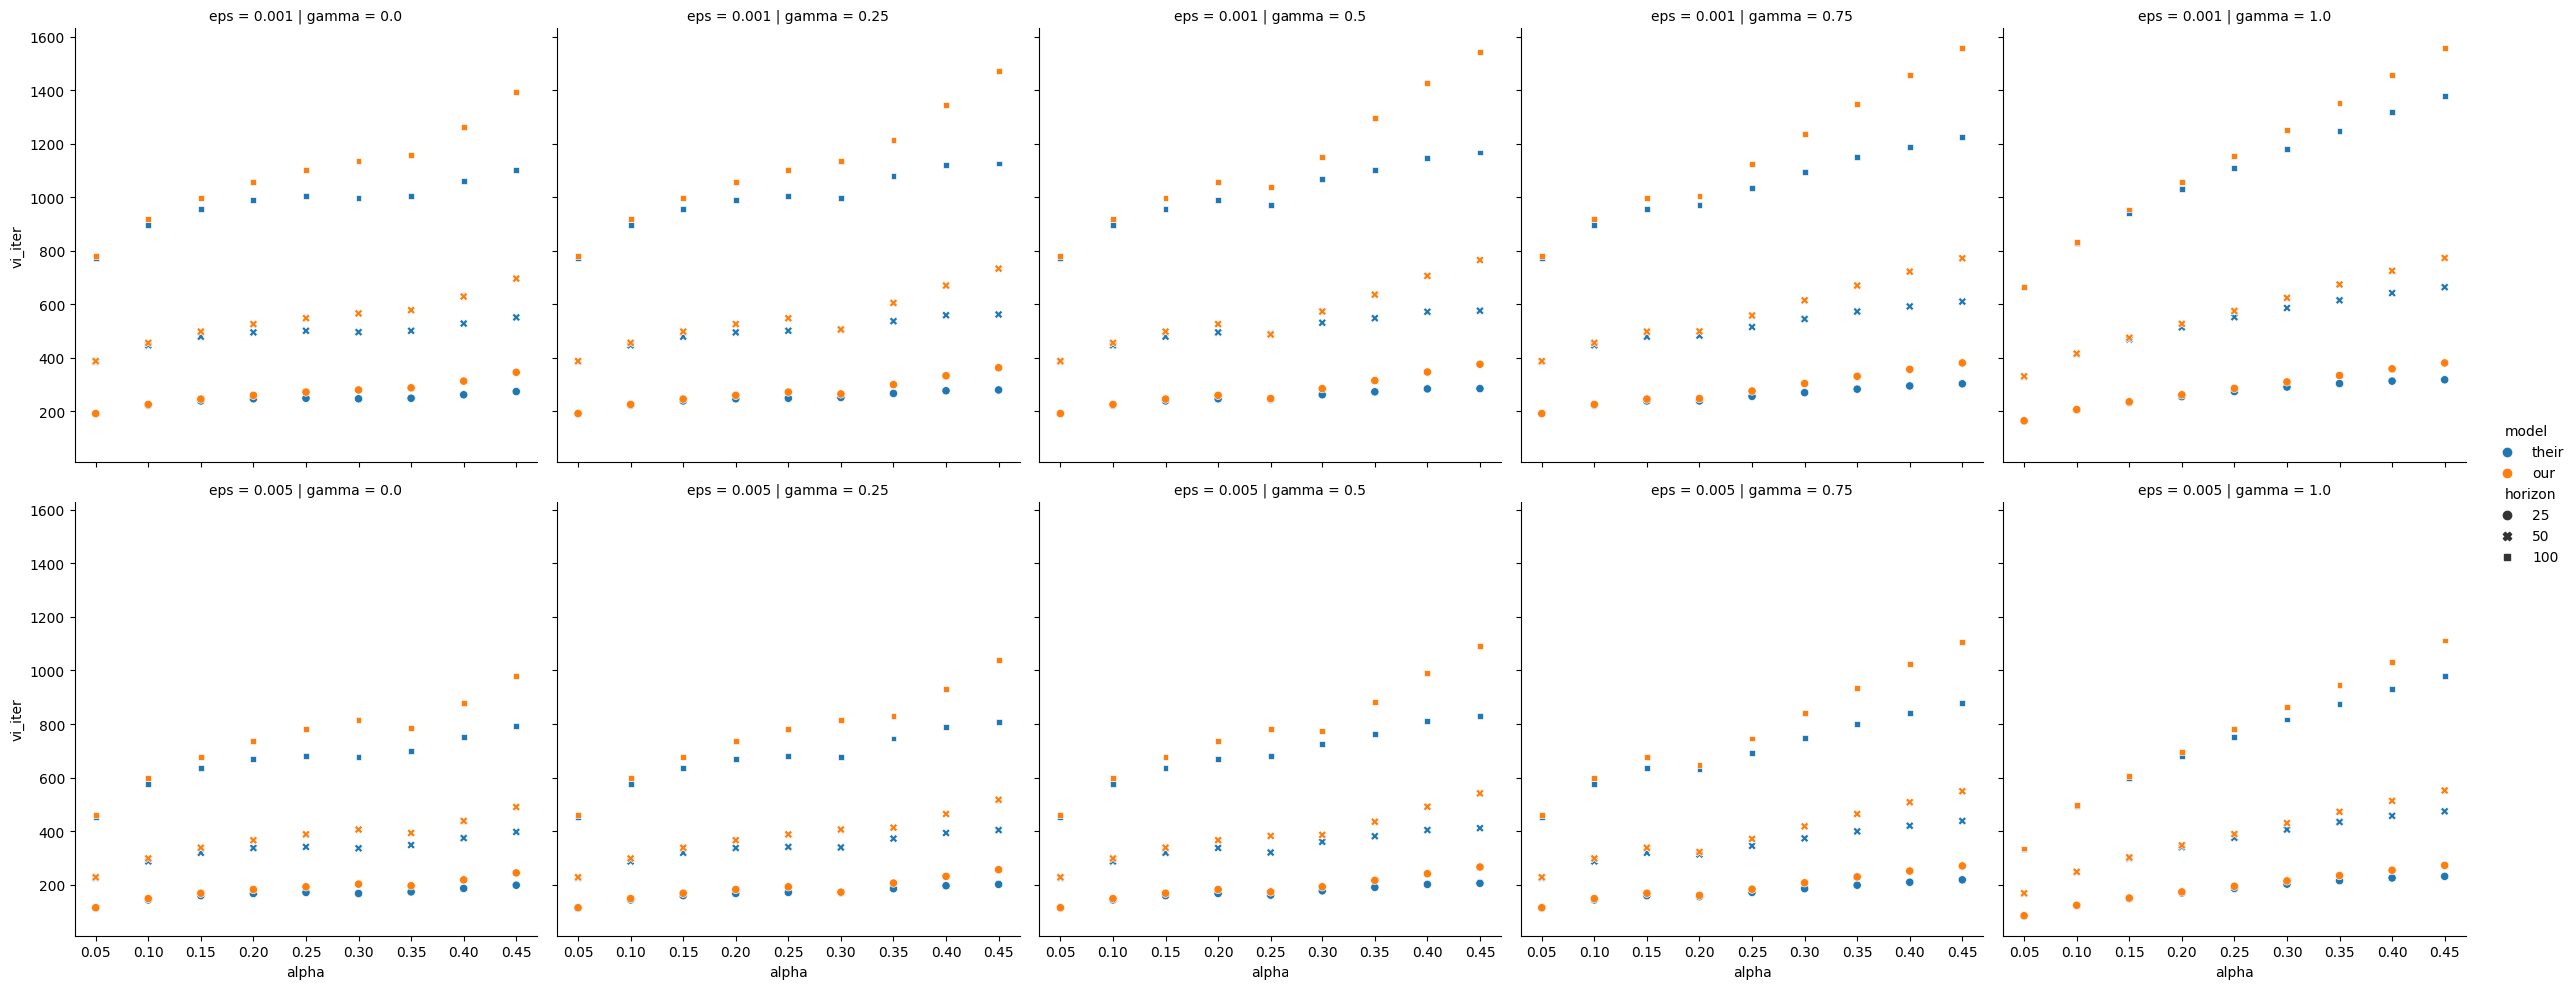

In [8]:
# Visualize number iterations required in value iteration
# It's intersting that the models behave so similar!
sns.relplot(
    data,
    x="alpha",
    y="vi_iter",
    col="gamma",
    hue="model",
    row="eps",
    style="horizon",
)

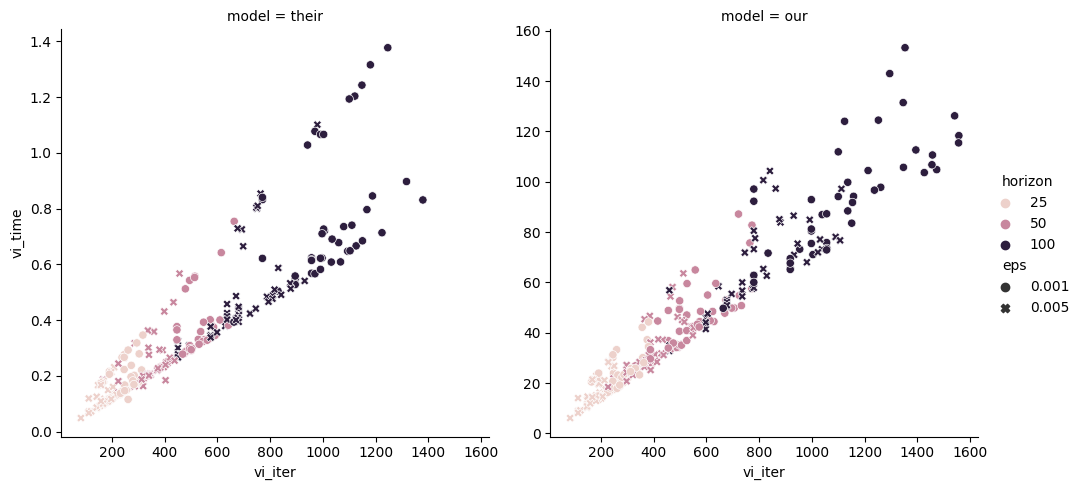

In [9]:
# Visualize solving time
# Naturally, the smaller model can be iterated much faster
sns.relplot(
    data,
    x="vi_iter",
    y="vi_time",
    hue="horizon",
    style="eps",
    col="model",
    facet_kws=dict(sharey=False),
)

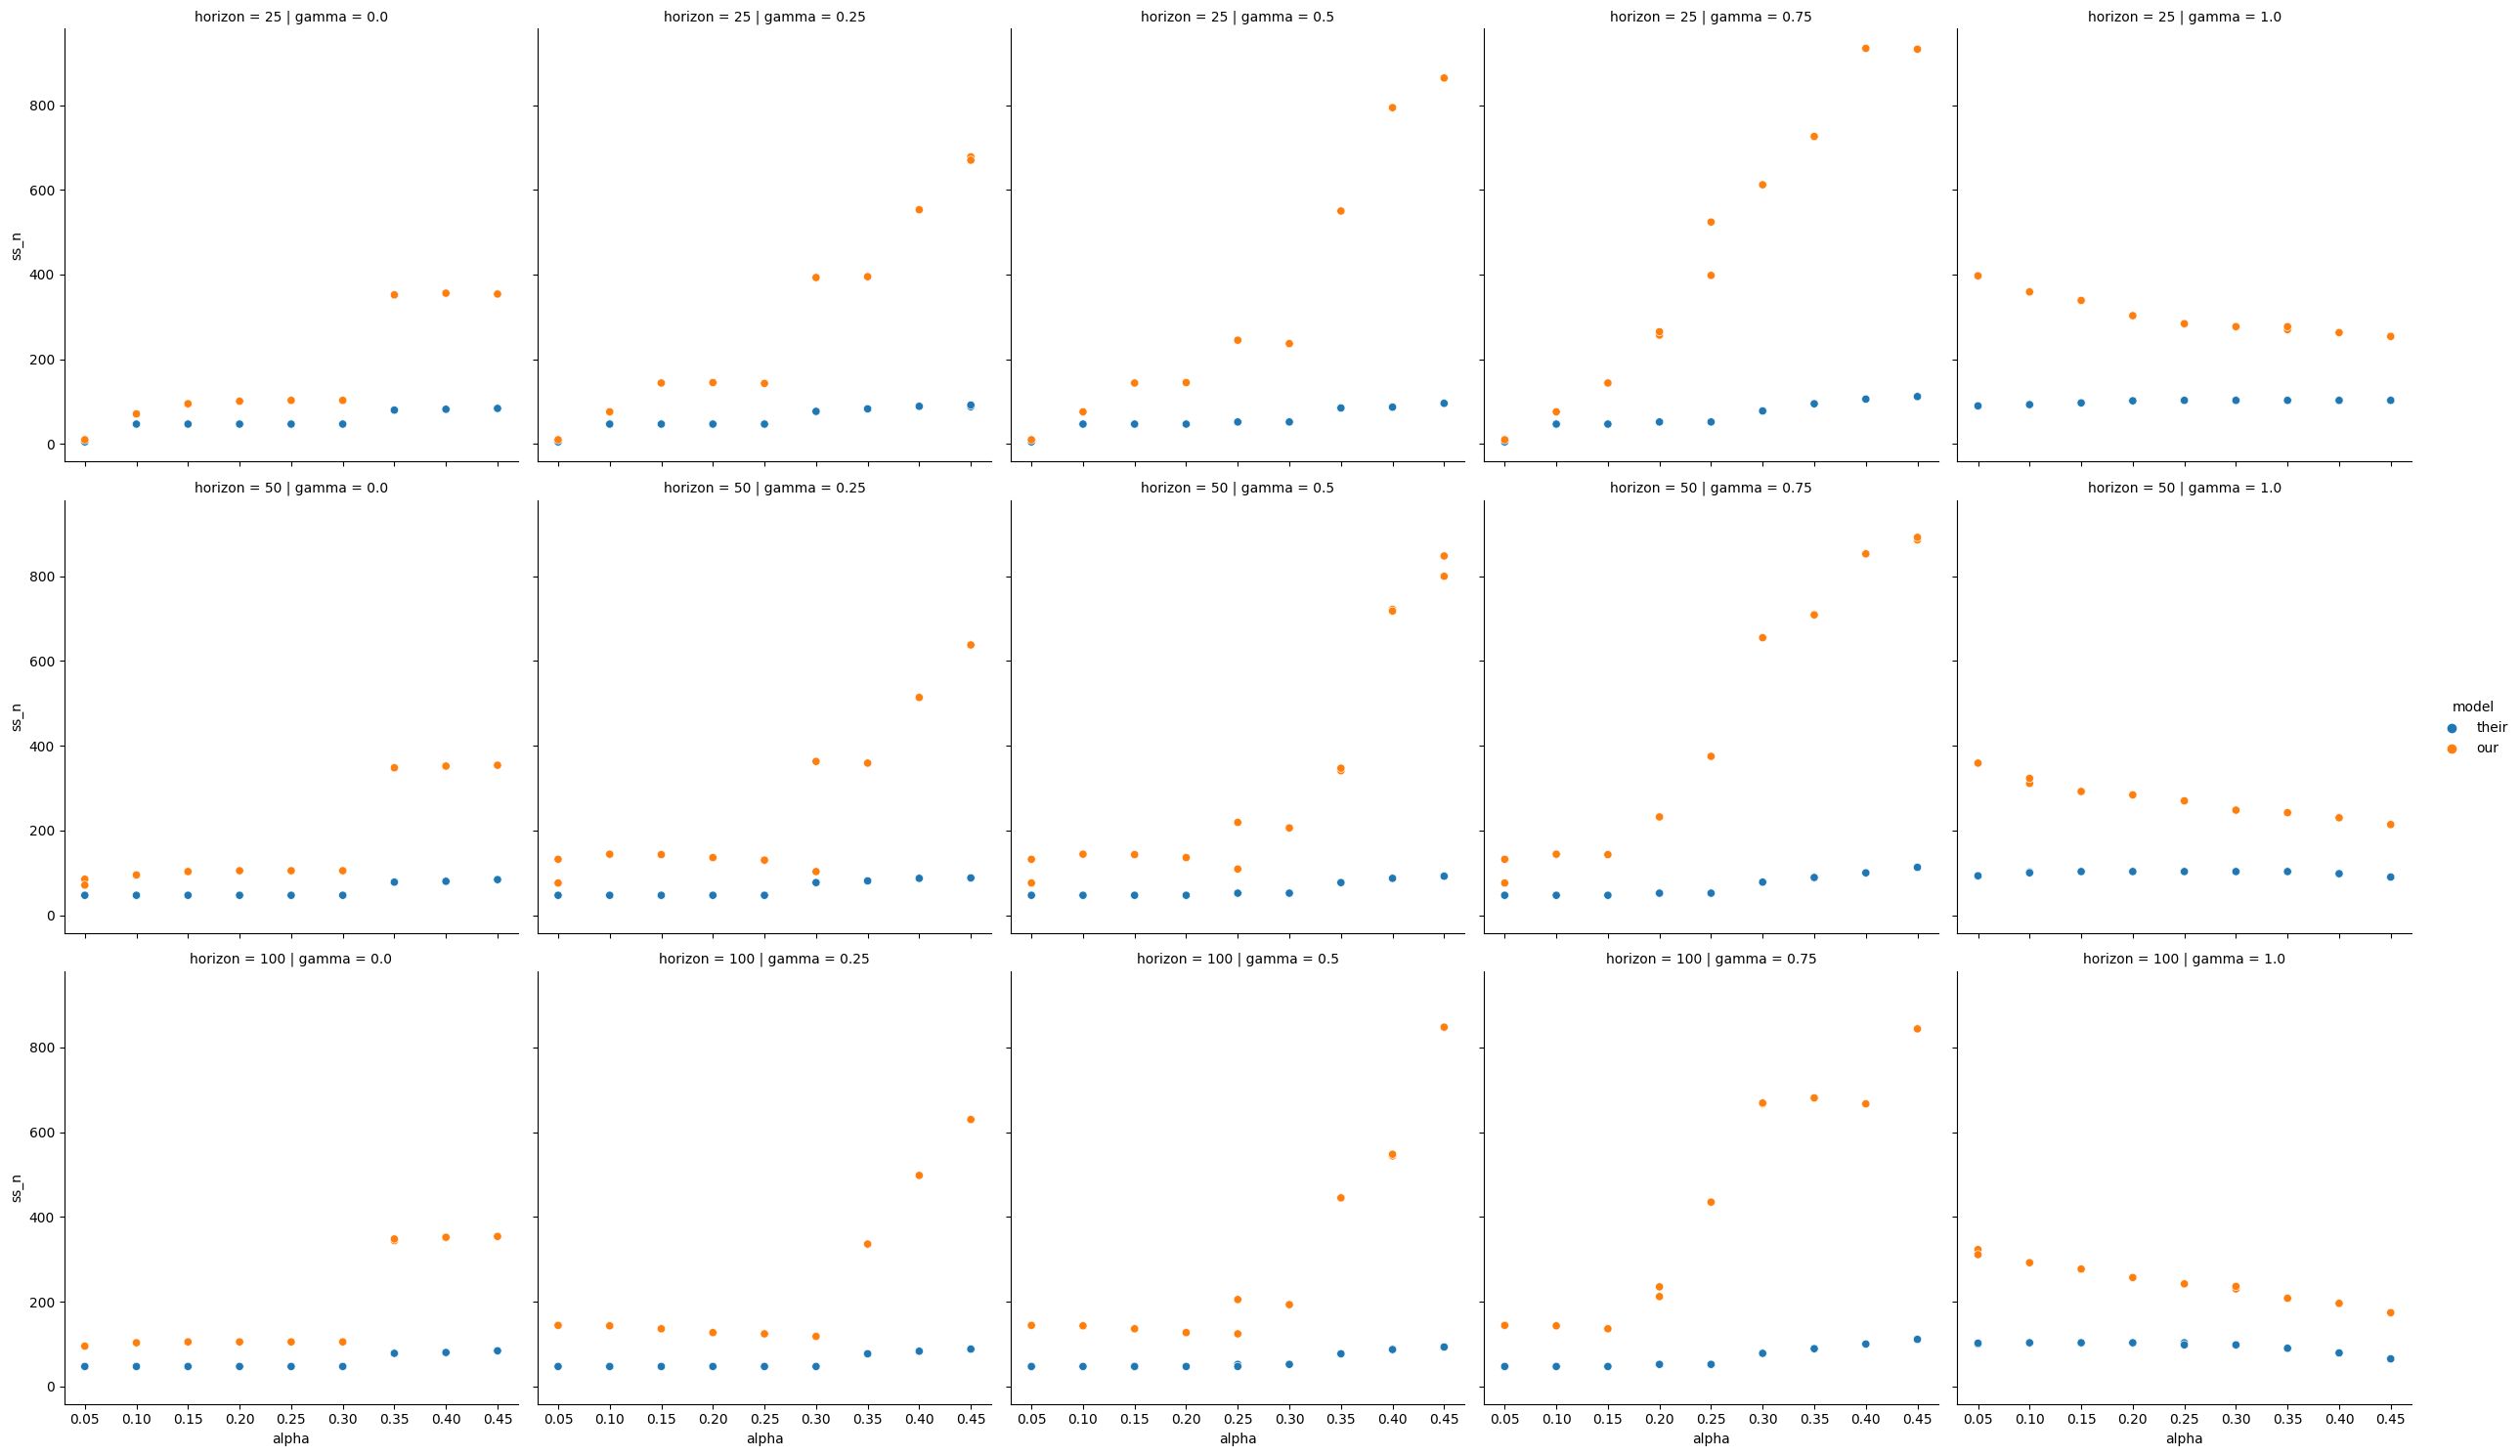

In [10]:
# Size of policy / steady state
sns.relplot(
    data,
    x="alpha",
    y="ss_n",
    col="gamma",
    row="horizon",
    hue="model",
)

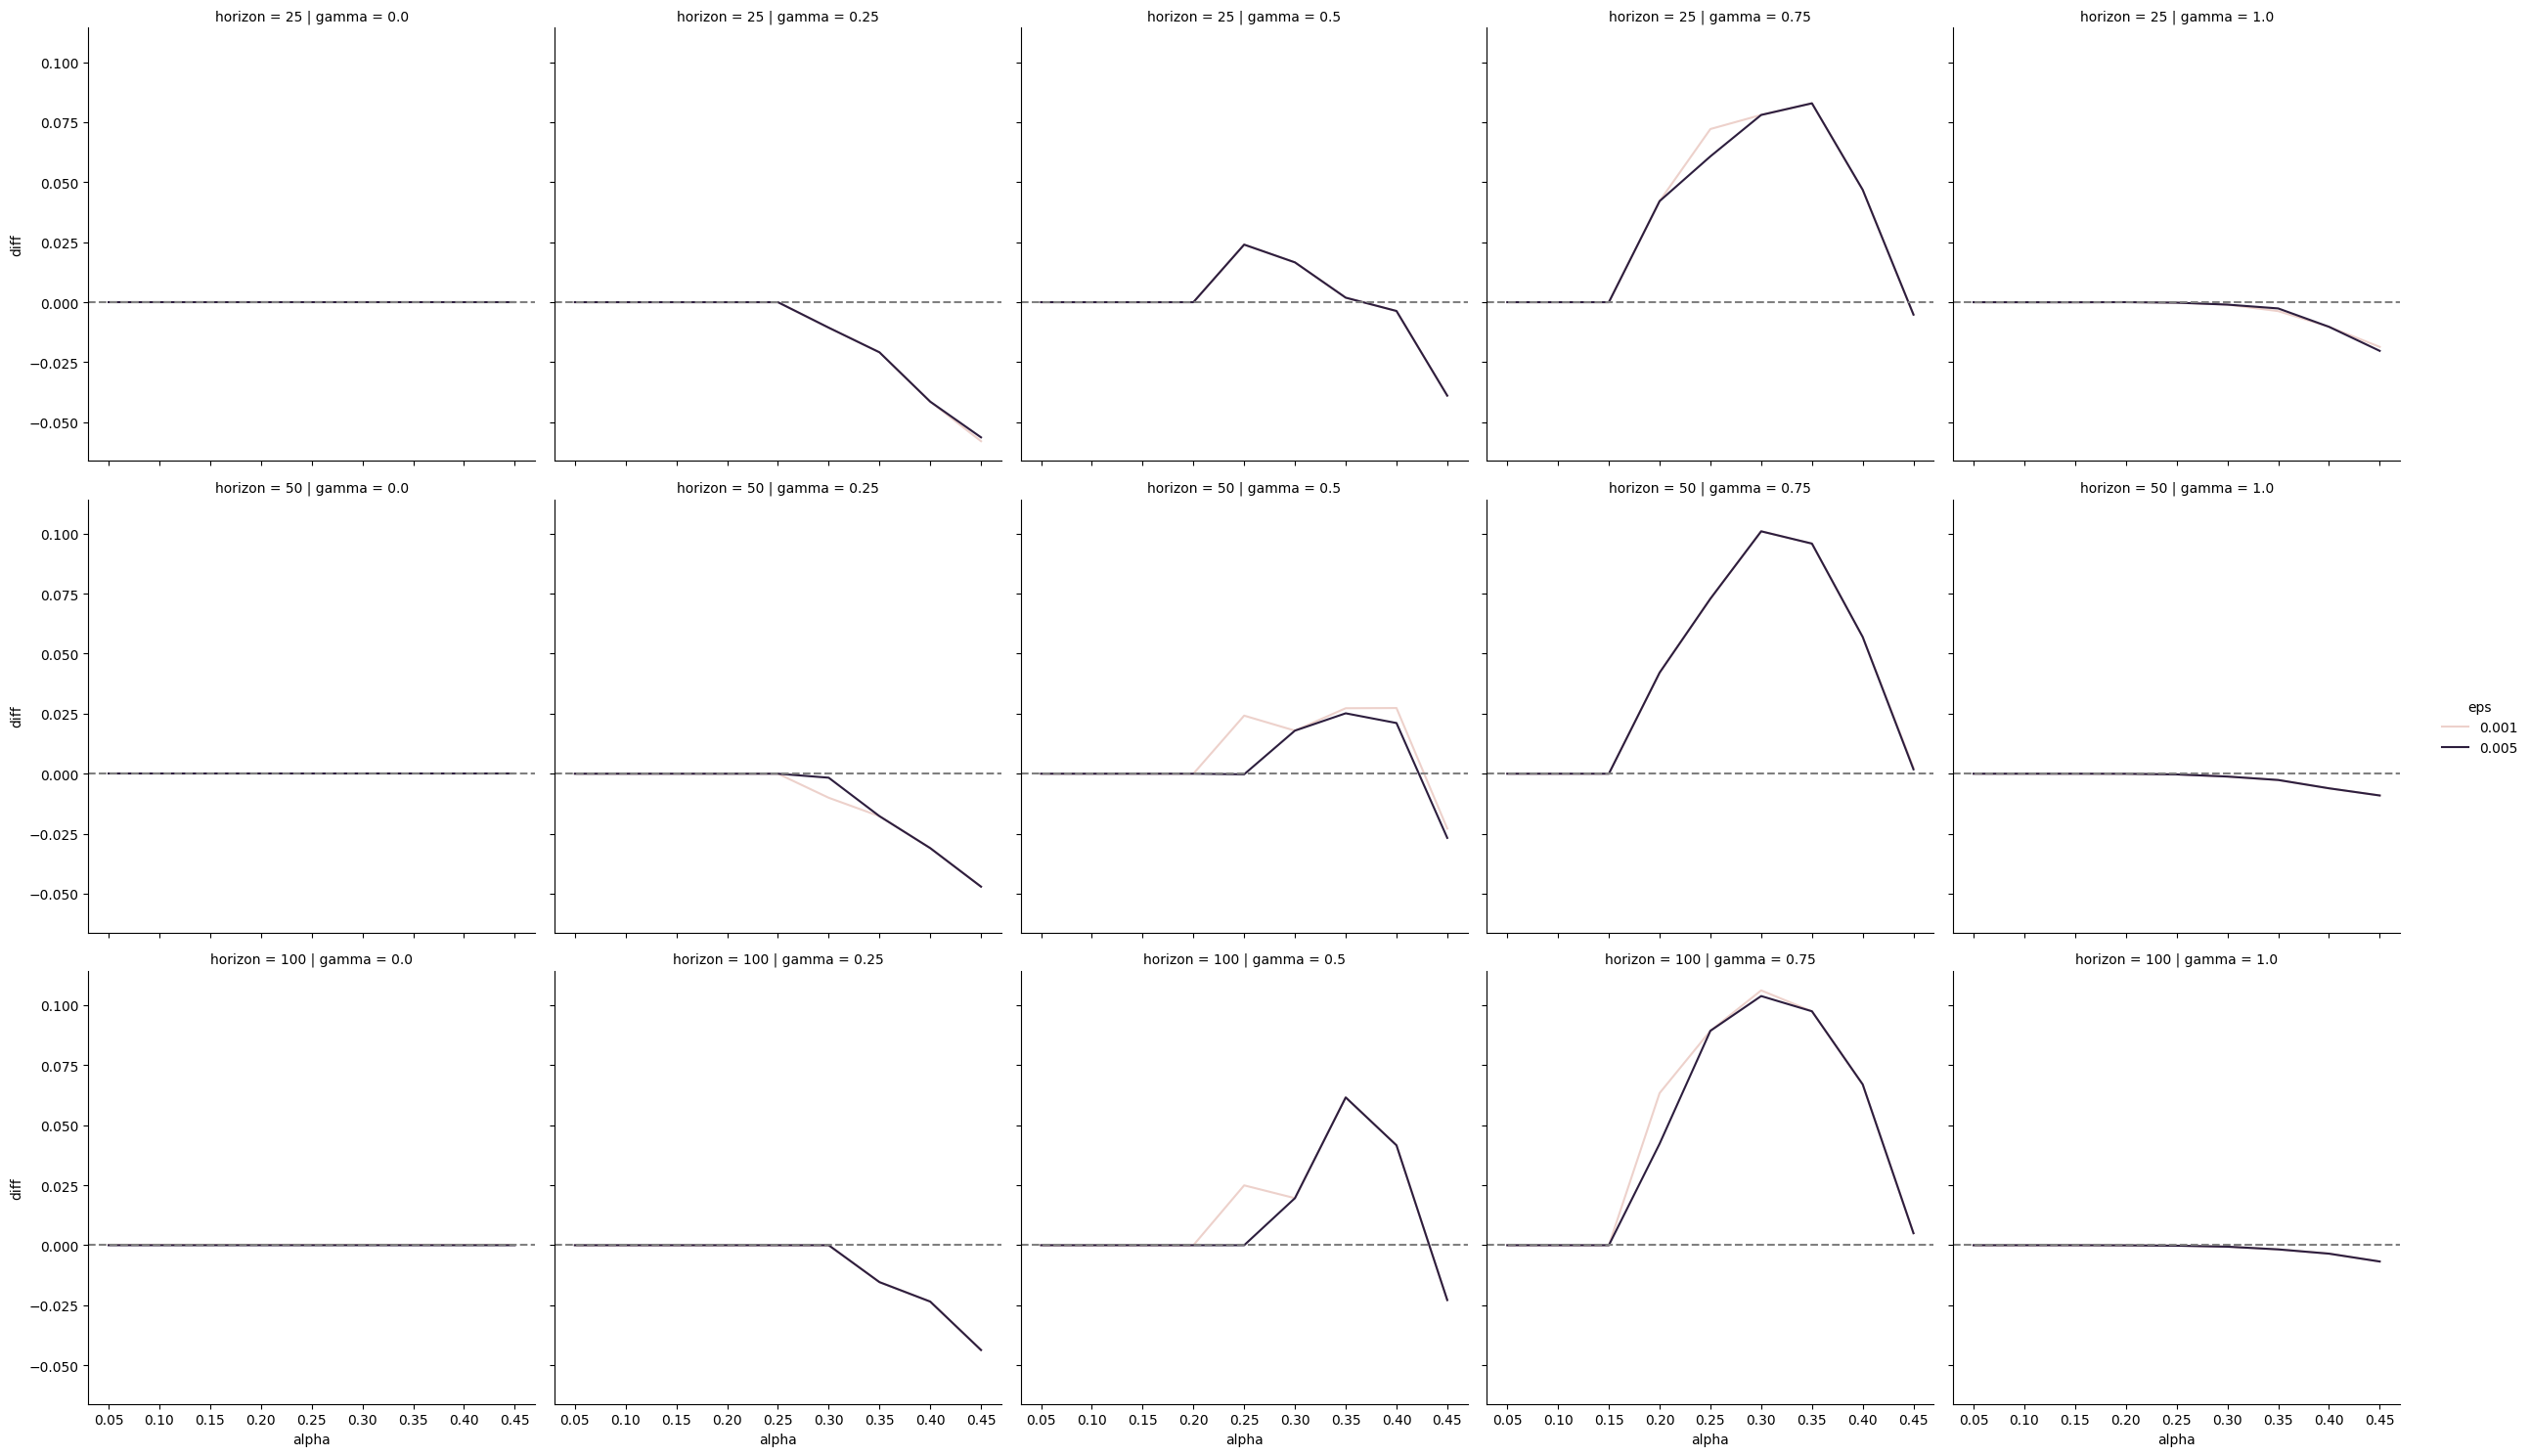

In [11]:
# We're now interested in the difference between the models
# Can we bring the differnce down by selecting better hyper params?
diff = data.pivot(
    index=["alpha", "gamma", "horizon", "eps"], columns="model", values=["rpp"]
)
diff.columns = [j for i, j in diff.columns]
diff["diff"] = diff.their - diff.our
diff = diff.reset_index()
sns.relplot(
    kind="line",
    data=diff,
    x="alpha",
    y="diff",
    row="horizon",
    col="gamma",
    hue="eps",
).refline(y=0)